## 1. Hierarchical Clustering (Use Euclidian Distance Function)

In [1]:
#Importing Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import re


In [2]:
f = open('Health-News-Tweets/Health-Tweets/everydayhealth.txt', encoding="utf8")

In [3]:
lines = f.readlines()

In [4]:
textPrc = []
for line in lines:
    temp=(line.lower().split('|'))
    temp[2] = re.sub(r'(:\ )?https?:\/\/.*[\r\n]*', '', temp[2], flags=re.MULTILINE)   
    temp[2] = temp[2].rstrip("\n")
    textPrc.append(temp[:3])
textPrc

[['304596701757464576',
  'thu feb 21 14:21:27 +0000 2013',
  '#fastfood makes up 11 percent of #calories in u.s. #diet '],
 ['304595191329853441',
  'thu feb 21 14:15:27 +0000 2013',
  '10 snacks to help you lose weight, burn fat, and build muscle'],
 ['304587659018371072',
  'thu feb 21 13:45:31 +0000 2013',
  '10 foods that boost your skin and slim your waistline'],
 ['304580073380524032',
  'thu feb 21 13:15:22 +0000 2013',
  "what a heart attack feels like in women (it's different than in men) "],
 ['304572560270573569',
  'thu feb 21 12:45:31 +0000 2013',
  "#mcdonalds oatmeal has almost 7 teaspoons of sugar in it! more healthy fast food that isn't"],
 ['304564965866627072',
  'thu feb 21 12:15:21 +0000 2013',
  '10 foods that boost your skin and slim your waistline'],
 ['304557384309829633',
  'thu feb 21 11:45:13 +0000 2013',
  "skipping kegels, using talcum powder, and more vaginal health mistakes you're probably making "],
 ['304549845501362177',
  'thu feb 21 11:15:16 +0000 

In [5]:
df = pd.DataFrame(textPrc, columns =['ID', 'Timestamp','Message'])  
df.head()
msglist = df['Message'].tolist()

In [6]:
msglist

['#fastfood makes up 11 percent of #calories in u.s. #diet ',
 '10 snacks to help you lose weight, burn fat, and build muscle',
 '10 foods that boost your skin and slim your waistline',
 "what a heart attack feels like in women (it's different than in men) ",
 "#mcdonalds oatmeal has almost 7 teaspoons of sugar in it! more healthy fast food that isn't",
 '10 foods that boost your skin and slim your waistline',
 "skipping kegels, using talcum powder, and more vaginal health mistakes you're probably making ",
 '10 foods that boost your skin and slim your waistline',
 "today's to do for a happier you: perform a random act of kindness (it'll make you feel better, too) ",
 "depression isn't the same for everybody. here are 9 different faces of the disorder",
 'why cutting out these unhealthy foods may actually make you a nicer person',
 'the worst snacks for your health',
 'why you should have sex today, tomorrow, the next day, and the day after that',
 'a @jillianmichaels bootcamp for your

### Tokenization

In [7]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
stop_words.add('a')
stop_words.add('they')
stop_words.add('the')
stop_words.add('his')
stop_words.add('.')
stop_words.add('!')
stop_words.add('http')
stop_words.add(':')
stop_words.add('//')
stop_words.add('@')
stop_words.add('#')
stop_words.add('so')
stop_words.add('and')
stop_words.add('were')
stop_words.add('from')
stop_words.add('that')
stop_words.add('of')
stop_words.add('in')
stop_words.add('only')
stop_words.add('with')
stop_words.add('to')
stop_words.add('http')
stop_words.add('-')
stop_words.add(',')
stop_words.add("\'s")
stop_words.add("\'")
stop_words.add('.')
stop_words.add(',')
stop_words.add('(')
stop_words.add(')')
stop_words.add('[')
stop_words.add(']')
stop_words.add(';')
stop_words.add(':')
stop_words.add('^')
stop_words.add('..')
stop_words.add('&')
stop_words.add('=')
stop_words.add('?')


In [21]:
messg = []
messg1 = []
for row1 in textPrc:
    word_tokens = word_tokenize(row1[2])
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    messg+=(filtered_sentence)
    messg1.append(filtered_sentence)
messg1

[['fastfood', 'makes', '11', 'percent', 'calories', 'u.s.', 'diet'],
 ['10', 'snacks', 'help', 'lose', 'weight', 'burn', 'fat', 'build', 'muscle'],
 ['10', 'foods', 'boost', 'skin', 'slim', 'waistline'],
 ['heart', 'attack', 'feels', 'like', 'women', 'different', 'men'],
 ['mcdonalds',
  'oatmeal',
  'almost',
  '7',
  'teaspoons',
  'sugar',
  'healthy',
  'fast',
  'food',
  "n't"],
 ['10', 'foods', 'boost', 'skin', 'slim', 'waistline'],
 ['skipping',
  'kegels',
  'using',
  'talcum',
  'powder',
  'vaginal',
  'health',
  'mistakes',
  "'re",
  'probably',
  'making'],
 ['10', 'foods', 'boost', 'skin', 'slim', 'waistline'],
 ['today',
  'happier',
  'perform',
  'random',
  'act',
  'kindness',
  "'ll",
  'make',
  'feel',
  'better'],
 ['depression', "n't", 'everybody', '9', 'different', 'faces', 'disorder'],
 ['cutting',
  'unhealthy',
  'foods',
  'may',
  'actually',
  'make',
  'nicer',
  'person'],
 ['worst', 'snacks', 'health'],
 ['sex', 'today', 'tomorrow', 'next', 'day', '

In [22]:

hel=[]
for i in messg:
    if (re.match("^\d+$",i)):
        continue
    else:
        hel.append(i)
messg=hel

### Stemming

In [23]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from num2word import word
ps = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer() 
stems = []
lemma = []
for k in messg:
    stems.append((ps.stem(k)))
messg = stems

In [24]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
for i in symbols:
    data = np.char.replace(messg, i, ' ')
np.char.replace(data, "'", "")

array(['fastfood', 'make', 'percent', ..., 'high-incom', 'countri',
       'worri'], dtype='<U26')

### IDF

In [31]:
#IDF
import math
idf = {}
for w in messg:
    counter = 1
    for k in messg1:
        if w in k:
            counter+=1
# messg1
    idf[w] = math.log(len(messg1)/counter)
idf

{'fastfood': 6.291260449943274,
 'make': 3.640368662681013,
 'percent': 5.685124646372959,
 'calori': 8.08301991917133,
 'u.s.': 5.192648161275165,
 'diet': 3.287229373574588,
 'snack': 4.94752570324218,
 'help': 3.3556321004589886,
 'lose': 3.893365177144904,
 'weight': 3.0078461039375024,
 'burn': 4.4995009807152195,
 'fat': 3.893365177144904,
 'build': 5.685124646372959,
 'muscl': 8.08301991917133,
 'food': 3.7522865788849984,
 'boost': 3.792560478022938,
 'skin': 4.321819803477767,
 'slim': 4.864144094303128,
 'waistlin': 8.08301991917133,
 'heart': 3.287229373574588,
 'attack': 4.824923381149847,
 'feel': 4.6818225375091735,
 'like': 3.908632649275692,
 'women': 4.112728005619208,
 'differ': 6.984407630503219,
 'men': 4.27635742940101,
 'mcdonald': 6.984407630503219,
 'oatmeal': 6.003578377491493,
 'almost': 6.473582006737229,
 'teaspoon': 8.08301991917133,
 'sugar': 4.05766822843618,
 'healthi': 8.08301991917133,
 'fast': 5.685124646372959,
 "n't": 3.0723846250750735,
 'skip': 5.

### TFIDF

In [33]:
# TFIDF
from collections import defaultdict
temp12=defaultdict(lambda:[])
for w in messg:
    counter=0;
    for i,k in enumerate(messg1):
        t = []
        if (w in k):
                t.append((k.count(w)/len(k))*idf[w])
        else:          
                t.append(0)
        temp12[i]+=t
tfidfdf = pd.DataFrame.from_dict(temp12).transpose()
tfidfdf

,0,1,2,3,4,5,6,7,8,9,...,25645,25646,25647,25648,25649,25650,25651,25652,25653,25654
0,0.898751,0.0,0.812161,0.0,0.741807,0.469604,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.372848,0.432596,0.334205,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3235,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3236,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3237,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.837091,0.0,0.680495,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


### Hierarchical Clustering 

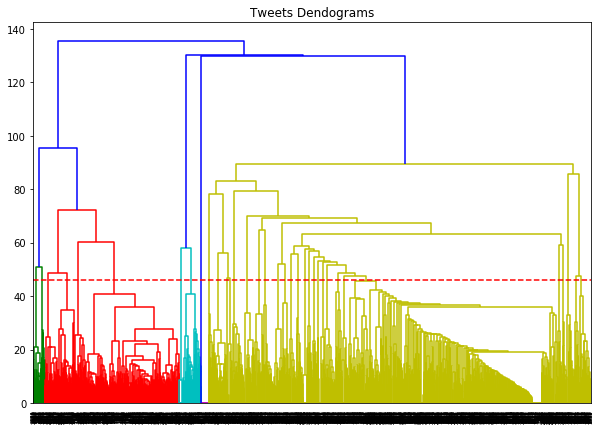

In [34]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title("Tweets Dendograms")
dend = shc.dendrogram(shc.linkage(tfidfdf, method = 'ward'))
plt.axhline(y=46, color='r', linestyle='--')

In [35]:
from sklearn.cluster import AgglomerativeClustering
X2 = np.array(tfidfdf)
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')  
(cluster.fit_predict(X2))


array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

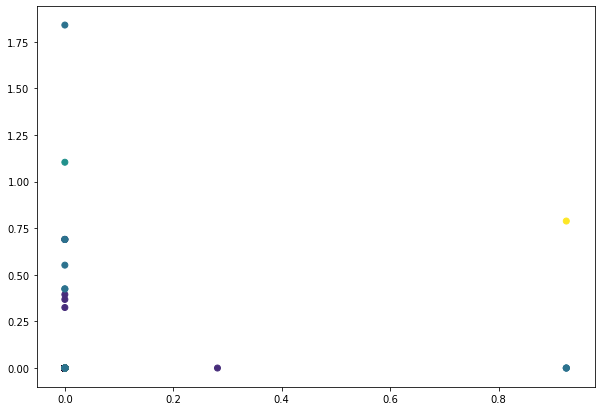

In [128]:
plt.figure(figsize=(10, 7))  
plt.scatter(X2[:,0], X2[:,1], c=cluster.labels_) 

## 1b). Expectation Maximization Cluster

In [36]:
# training gaussian mixture model
from sklearn.mixture import GaussianMixture

In [37]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X2[:3000,:3000])
#predictions from gmm
labels = gmm.predict(X2[:3000,:3000])
frame = pd.DataFrame(X2[:3000,:3000])

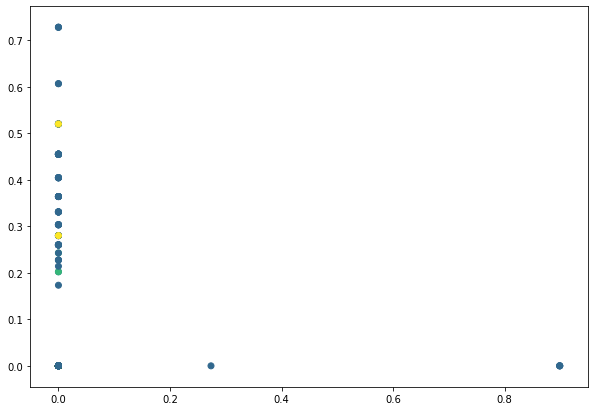

In [38]:
plt.figure(figsize=(10, 7))  
plt.scatter(frame.iloc[:, 0], frame.iloc[:, 1], c=labels);